In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import svm

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix,roc_curve,mean_squared_error,classification_report
from sklearn.model_selection import train_test_split ,LeaveOneOut, cross_val_score,GridSearchCV,StratifiedKFold,learning_curve


In [2]:
# Load the CSV file using pandas
data = pd.read_csv('reduced_data.csv')

# Separate the features (X) and the target variable (y)
X = data.drop('target', axis=1)
y = data['target']

In [3]:
# Split the resampled and PCA-transformed dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
# Create a SVM Classifier object
svm_classifier = svm.SVC()

# Train the classifier using the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Define the hyperparameters to search over
hyperparameters = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
print(classification_report(y_test, y_pred))

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, hyperparameters, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)  

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7393
           1       0.99      1.00      1.00      7406

    accuracy                           1.00     14799
   macro avg       1.00      1.00      1.00     14799
weighted avg       1.00      1.00      1.00     14799



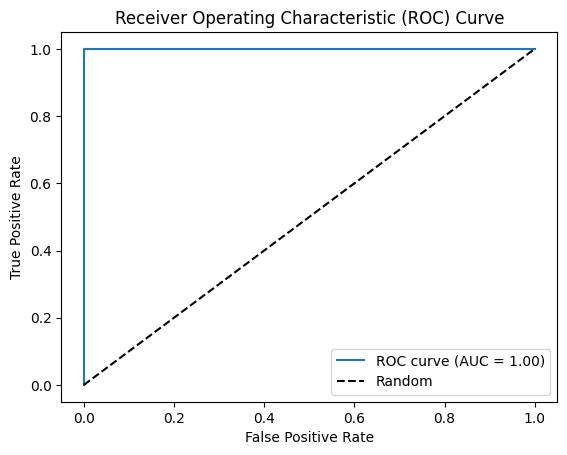

In [ ]:

# Obtain the decision scores for the ROC curve
decision_scores = svm_classifier.decision_function(X_test)

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, decision_scores)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

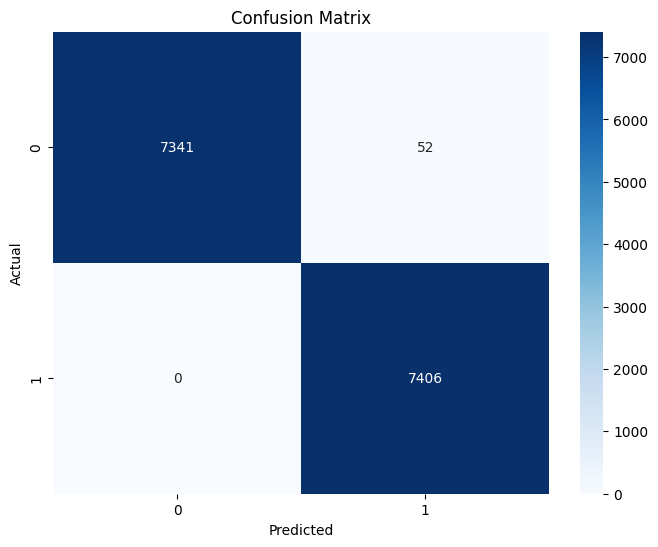

In [ ]:
# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

# assuming y_test and y_pred are the true and predicted labels, respectively
# calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# calculate the precision
precision = precision_score(y_test, y_pred)

# calculate the sensitivity/recall
sensitivity = recall_score(y_test, y_pred)

# calculate the specificity
specificity = tn / (tn + fp)

# calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)

# print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Sensitivity/Recall:", sensitivity)
print("Specificity:", specificity)
print("AUC Score:",auc_score)
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Accuracy: 0.9964862490708831
Mean Squared Error: 0.003513750929116832


[0.9013379282383946, 0.9155483478613421, 0.9233311128027091]


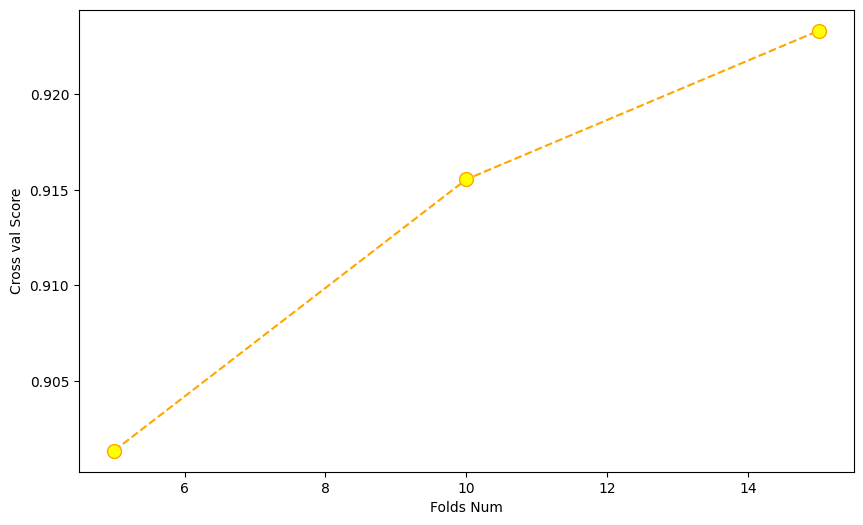

In [ ]:


def k_folds_cross_val(folds_num,svm_classifier,X, Y):

    sk_folds = StratifiedKFold(n_splits = folds_num)
    scores = cross_val_score(svm_classifier, X ,Y, cv = sk_folds)

    # print("Cross Validation Scores: ", scores)
    # print("Average CV Score: ", scores.mean())
    # print("Number of CV Scores used in Average: ", len(scores))

    return scores

def LeaveOneOut_cross_val(svm_classifier,X, Y):
    
    loo = LeaveOneOut()

    scores = cross_val_score(svm_classifier,X, Y, cv = loo)

    # print("Cross Validation Scores: ", scores)
    # print("Average CV Score: ", scores.mean())
    # print("Number of CV Scores used in Average: ", len(scores))

    return scores

def cross_val(classifier,X, Y):
    
    scores=[]
    for folds_num in range (5,20,5):
      K_scores= k_folds_cross_val(folds_num,svm_classifier,X, Y)
      scores.append(K_scores.mean())
    print(scores)
    plt.figure(figsize=(10, 6))
    plt.plot(range (5,20,5), scores, color='orange', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
    plt.xlabel('Folds Num')
    plt.ylabel('Cross val Score')

    # LeaveOneOut_scores=LeaveOneOut_cross_val(classifier,X, Y)
    # plt.figure(figsize=(10, 6))
    # plt.plot(range(len(LeaveOneOut_scores)), LeaveOneOut_scores, color='orange', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)

cross_val(svm_classifier,X, y )

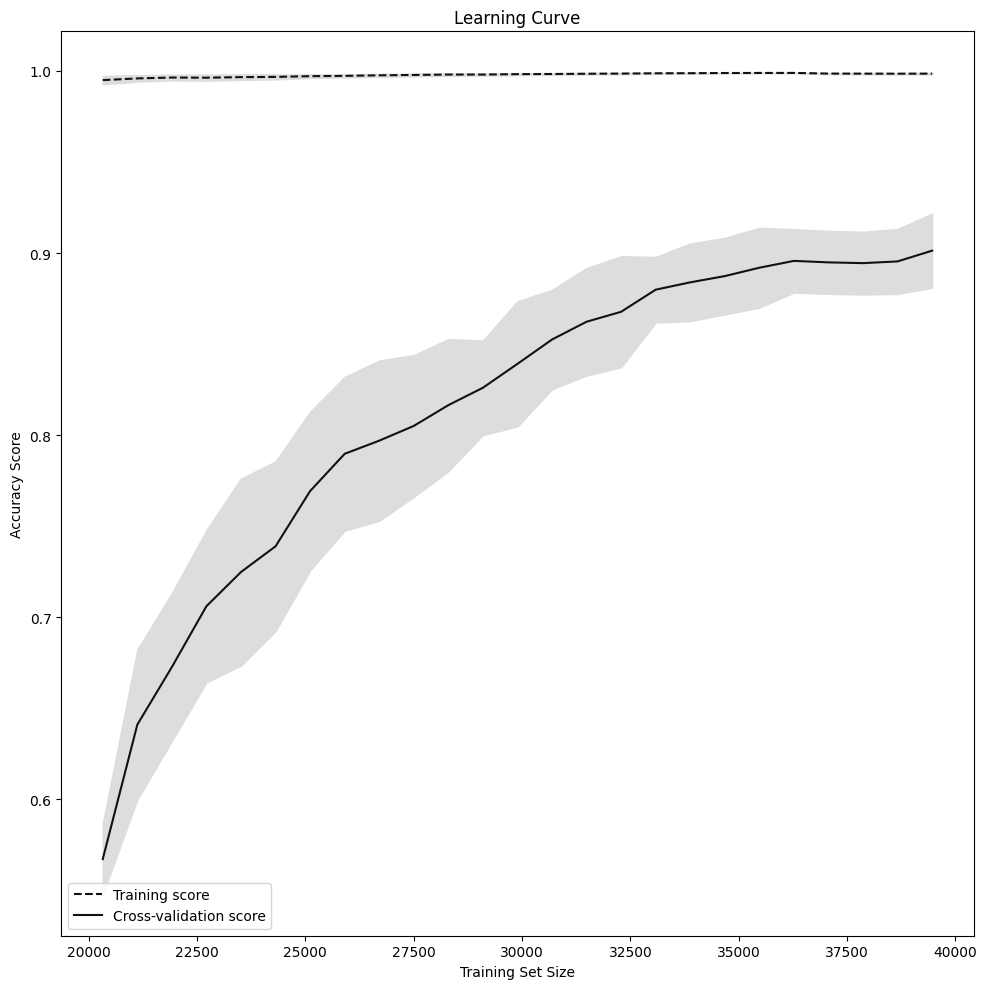

In [ ]:

def PlotlearningCurve(classifier,x,y):
    #  Learning Curve and Scores
    train_sizes, train_scores, test_scores = learning_curve(svm_classifier,x,y, cv=5, scoring='accuracy'
                                                                , n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    # Ploting the Learning Curve
    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

PlotlearningCurve(svm_classifier,X,y)